In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import interpolate
import sklearn as skl
import sklearn.linear_model
matplotlib.style.use('ggplot')
fig_size = [10, 8]
plt.rcParams["figure.figsize"] = fig_size

In [3]:
handle=pd.read_csv('handle.csv', sep=',',header=0)
door=pd.read_csv('door.csv', sep=',',header=0)

<IPython.core.display.Javascript object>


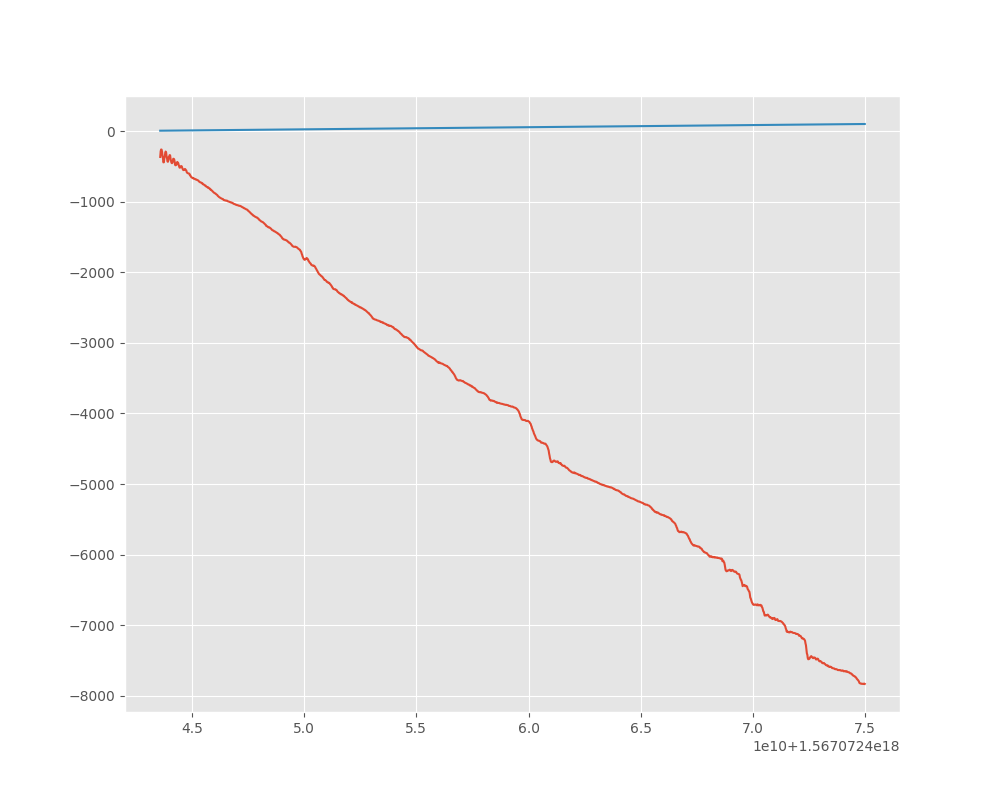

In [4]:
force = interpolate.interp1d(handle.time, handle['field.force'], fill_value='extrapolate')
t = door.time
c = door['field.brake_current']
f = force(door.time)

idx = door['field.state'] == 6

t = t[idx]
c = c[idx]
f = f[idx]

idx = c > 5

t = t[idx]
c = c[idx]
f = f[idx]

fig = plt.figure()
plt.plot(t, f)
plt.plot(t, c)
plt.show()

In [5]:
c = c.reshape(-1, 1)
f = abs(f.reshape(-1, 1))
n = 100
x1 = np.zeros([n, 1])
x0 = np.zeros([n, 1])
cnt = np.zeros_like(t)
for i in range(0, n):
    model_ransac = skl.linear_model.RANSACRegressor(skl.linear_model.LinearRegression(), max_trials=1000)
    model_ransac.fit(c, f)
    x1[i] = model_ransac.estimator_.coef_
    x0[i] = model_ransac.estimator_.intercept_
    cnt[model_ransac.inlier_mask_] = cnt[model_ransac.inlier_mask_] + 1   

/home/davide/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


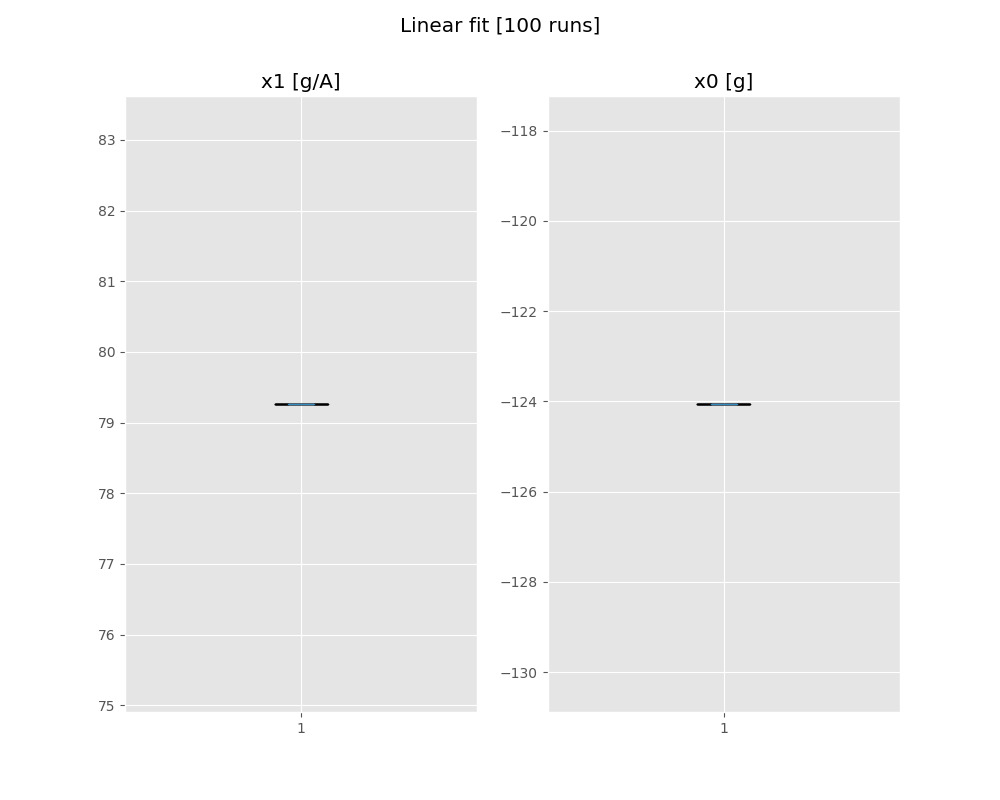

MEAN:   y=79.263120 * x + -124.057035 [0.000000, 0.000000]
MEDIAN: y=79.263120 * x + -124.057035 [0.000000, 0.000000]


<IPython.core.display.Javascript object>


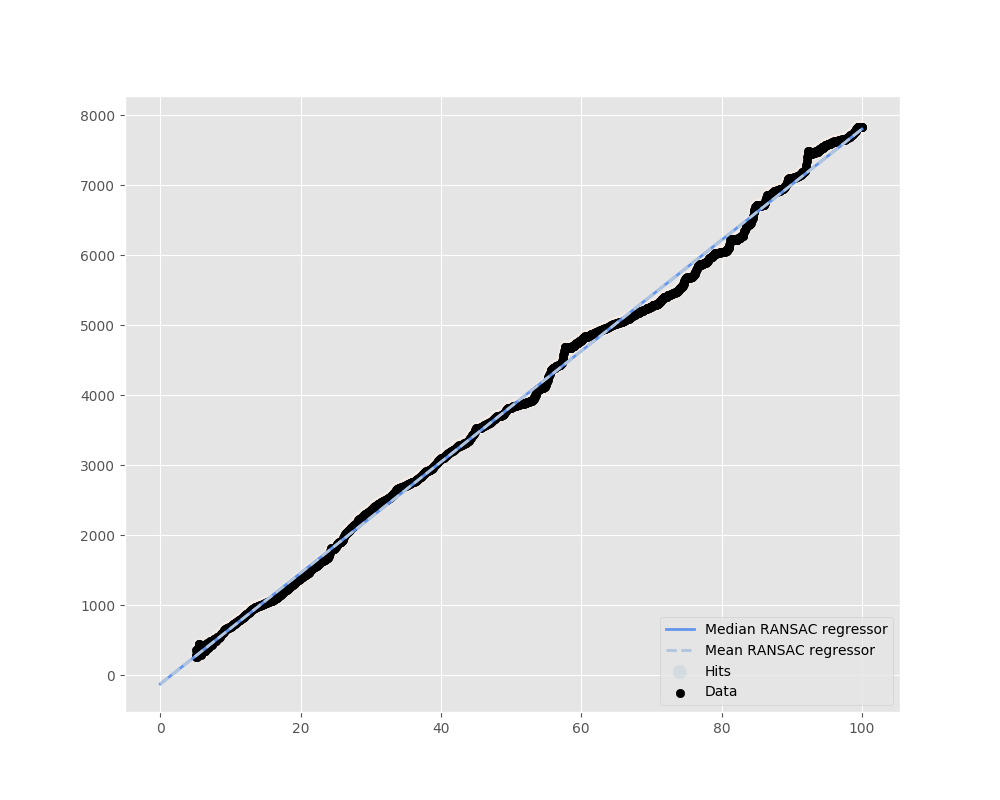

In [6]:
    def mad(arr):
        arr = np.ma.array(arr).compressed() # should be faster to not use masked arrays.
        med = np.median(arr)
        return np.median(np.abs(arr - med))
    
    fig = plt.figure()
    fig.suptitle("Linear fit [%d runs]" % n, fontsize="x-large")
    
    plt_x0 = fig.add_subplot(1,2,1)
    plt_x0.set_title("x1 [g/A]")
    plt_x0.boxplot(x1, 1)
    
    plt_x1 = fig.add_subplot(1,2,2)
    plt_x1.set_title("x0 [g]")
    plt_x1.boxplot(x0, 1)
    
    x0_mean = np.mean(x0)
    x1_mean = np.mean(x1)
    x0_median = np.median(x0)
    x1_median = np.median(x1)
    x0_std = np.std(x0)
    x1_std = np.std(x1)
    x0_mad = mad(x0)
    x1_mad = mad(x1)
    
    print("MEAN:   y=%f * x + %f [%f, %f]" % (x1_mean, x0_mean, x1_std, x0_std))
    print("MEDIAN: y=%f * x + %f [%f, %f]" % (x1_median, x0_median, x1_mad, x0_mad))
    
    x_ransac = np.linspace(0, np.max(c), 2)
    y_ransac_median = x0_median + x_ransac * x1_median
    y_ransac_mean = x0_mean + x_ransac * x1_mean
    
    plt.figure()
    lw = 2
    
    ss = np.argsort(cnt, 0)
    plt.scatter(c[ss], f[ss], c=cnt[ss], s=cnt[ss], alpha=0.1, edgecolors='none', cmap=plt.get_cmap('Reds'), label='Hits')

    plt.scatter(c, f, color='black', label='Data')
    
    plt.plot(x_ransac, y_ransac_median, color='cornflowerblue', linestyle='-', linewidth=lw, label='Median RANSAC regressor')
    plt.plot(x_ransac, y_ransac_mean, color='lightsteelblue', linestyle='--', linewidth=lw, label='Mean RANSAC regressor')
    plt.legend(loc='lower right')
    
    plt.grid(True)
    plt.show()

In [7]:
79.263120 /0.0132699999958

5973.10625660038